In [1]:
import pandas as pd
import numpy as np
import datetime as dt

Plotting on Maps

In [2]:
import folium

In [196]:
def mzd(minuten):
    """rechnet GPS-Minutenins Dezimalsystem um"""
    return minuten/60

In [197]:
# Porto liegt bei 41° 9′ N, 8° 37'
porto_coord = (41 + mzd(9), -8 - mzd(37))
porto_coord

(41.15, -8.616666666666667)

In [198]:
Porto = folium.Map(porto_coord,
                    zoom_start=13,
                    tiles='OpenStreetMap')
Porto

In [90]:
from geopy.geocoders import Nominatim

In [199]:
loc = Nominatim(user_agent='spiced_maps').geocode("Dachla, Egypt")
loc.address

'الواحات الداخلة, الوادي الجديد, Egypt / مصر'

In [200]:
coord_dachla = loc.latitude, loc.longitude
coord_dachla

(25.5120622, 29.2581601)

In [201]:
Dachla = folium.Map(coord_dachla,
                    zoom_start=13,
                    tiles='OpenStreetMap')
Dachla

Zusatz a)
choropleth funktion in folium (geojson)
Visualisierung der Klimaergebnisse

DataFrame erstellen

In [3]:
data = pd.read_csv('TG_STAID000215.txt', header=15, index_col = 2, parse_dates=True)
data=data.drop(columns=['STAID',' SOUID'])
data.rename(columns={' Q_TG': 'pruefung', '   TG': 'temp_mean'}, inplace=True)
data= data.reset_index()
data.rename(columns={'    DATE': 'date'}, inplace=True)
data=data.set_index('date')
data= data[(data.pruefung == 0)]
data['temp_mean']=data['temp_mean'].div(10)
print(data.shape)
data.head()

(20511, 2)


,temp_mean,pruefung
date,,
1941-01-02,7.3,0
1941-01-03,4.2,0
1941-01-04,4.8,0
1941-01-05,2.6,0
1941-01-06,2.2,0


In [4]:
data_week=data.resample('7d').mean()
print(data_week.shape)
data_week.head()

(3079, 2)


,temp_mean,pruefung
date,,
1941-01-02,4.128571,0.0
1941-01-09,4.657143,0.0
1941-01-16,9.085714,0.0
1941-01-23,11.885714,0.0
1941-01-30,8.414286,0.0


In [202]:
data_month_=data.resample('1m').mean()
print(data_month.shape)
data_month.head()
data_month_porto=data_month

(708, 2)


In [6]:
data_year=data.resample('1y').mean()
print(data_year.shape)
data_year.head()

(59, 2)


,temp_mean,pruefung
date,,
1941-12-31,13.992857,0
1942-12-31,14.474366,0
1943-12-31,14.577429,0
1944-12-31,14.199150,0
1945-12-31,14.985754,0


In [7]:
df = data.reset_index()
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
print(df.columns)
print(df.shape)
df.head()

Index(['date', 'temp_mean', 'pruefung', 'month', 'year'], dtype='object')
(20511, 5)


,date,temp_mean,pruefung,month,year
0,1941-01-02,7.3,0,1,1941
1,1941-01-03,4.2,0,1,1941
2,1941-01-04,4.8,0,1,1941
3,1941-01-05,2.6,0,1,1941
4,1941-01-06,2.2,0,1,1941


Time Series Decomposition
(Trend, Seasonality, Baseline with noise)

In [8]:
df_index = df.set_index('date')
df_index.head()

,temp_mean,pruefung,month,year
date,,,,
1941-01-02,7.3,0,1,1941
1941-01-03,4.2,0,1,1941
1941-01-04,4.8,0,1,1941
1941-01-05,2.6,0,1,1941
1941-01-06,2.2,0,1,1941


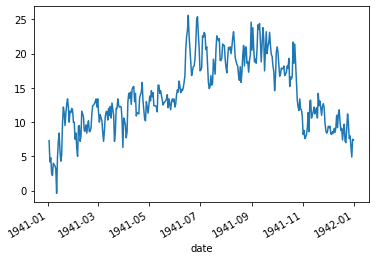

In [9]:
df_index.loc['1941-01-01':'1941-12-31','temp_mean'].plot()

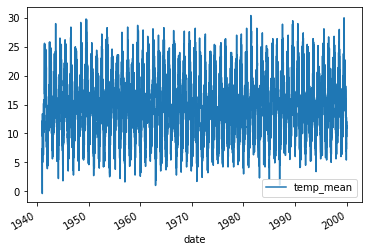

In [10]:
#df=df.reset_index()
df.plot(x='date', y='temp_mean')

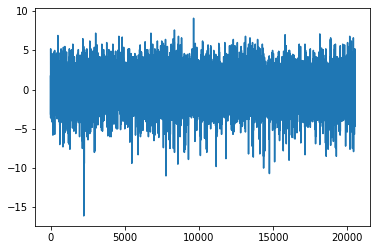

In [11]:
df['diff'] = df['temp_mean'].diff()
df['diff'].plot()

In [12]:
mm = df.groupby('month')['diff'].mean()
mm

month
1     0.033314
2     0.035754
3     0.058954
4     0.067908
5     0.062139
6     0.111779
7     0.016014
8    -0.003840
9    -0.058862
10   -0.137971
11   -0.115348
12   -0.067400
Name: diff, dtype: float64

In [13]:
df=df.set_index('date')
df=df.resample('1m').mean()
df['deseasoned'] = df['diff'] / (list(mm) * 59)

In [14]:
df['deseasoned'].mean()

1.0111011596522999

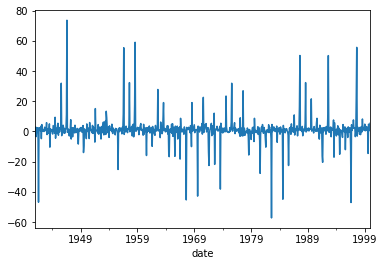

In [15]:
df['deseasoned'].plot()

In [16]:
#Umkehroperation von pctchange ist kumulatives Produkt
#Umkerfunktion von Diff ist kumulative Summe

Train a linear model: Lineare Regression

In [17]:
#Forecast for 2050

In [27]:
df['month_i'] = np.abs(df.index.month - 7) 
#Abstand vom höchsten Punkt (Juli=Max, Juni/Aug=Max-1, Jan/Dez=0)
df.head(12)

,temp_mean,pruefung,month,year,diff,deseasoned,month_i
date,,,,,,,
1941-01-31,7.670000,0,1,1941,0.093103,2.794687,6
1941-02-28,9.722222,0,2,1941,0.081481,2.278935,5
1941-03-31,10.806897,0,3,1941,-0.203448,-3.450969,4
1941-04-30,12.439286,0,4,1941,0.178571,2.629616,3
1941-05-31,13.314286,0,5,1941,0.075000,1.206977,2
1941-06-30,18.235714,0,6,1941,0.264286,2.364363,1
1941-07-31,19.496552,0,7,1941,-0.055172,-3.445255,0
1941-08-31,19.480000,0,8,1941,0.180000,-46.880597,1
1941-09-30,20.563333,0,9,1941,-0.146667,2.491709,2


In [19]:
from sklearn.linear_model import LinearRegression, Ridge

In [20]:
X = df[['year', 'month_i']]
y = df['temp_mean']

X.shape, y.shape

((708, 2), (708,))

In [21]:
Xtrain = X[:550]
Xtest = X[550:]
ytrain = y[:550]
ytest = y[550:]
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((550, 2), (158, 2), (550,), (158,))

In [22]:
m = LinearRegression()
m.fit(Xtrain, ytrain)
m.score(Xtrain, ytrain)

0.8348460205659689

In [23]:
m.score(Xtest, ytest)

0.7836655891562683

In [24]:
m.coef_, m.intercept_

(array([-0.0084556 , -2.04723282]), 37.135701288287585)

In [28]:
idx = pd.date_range('2000-01-01', '2000-12-31', freq='MS')
X_forecast=pd.DataFrame({'year':idx.year,'month_i': [6,5,4,3,2,1,0, 1, 2, 3, 4, 5]}, index=idx)

In [29]:
#month_i Abstand vom höchsten Punkt (Juli=Max, Juni/Aug=Max-1, Jan/Dez=0)
#ypred_nochangeofpolitics = m.predict([[2050,-1]])
#ypred_nochangeofpolitics

X_forecast['temp_prog'] = pd.Series(m.predict(X_forecast), index=idx)

In [30]:
X_forecast.head(12)

,year,month_i,temp_prog
2000-01-01,2000,6,7.941097
2000-02-01,2000,5,9.988330
2000-03-01,2000,4,12.035563
2000-04-01,2000,3,14.082795
2000-05-01,2000,2,16.130028
2000-06-01,2000,1,18.177261
2000-07-01,2000,0,20.224494
2000-08-01,2000,1,18.177261
2000-09-01,2000,2,16.130028
2000-10-01,2000,3,14.082795


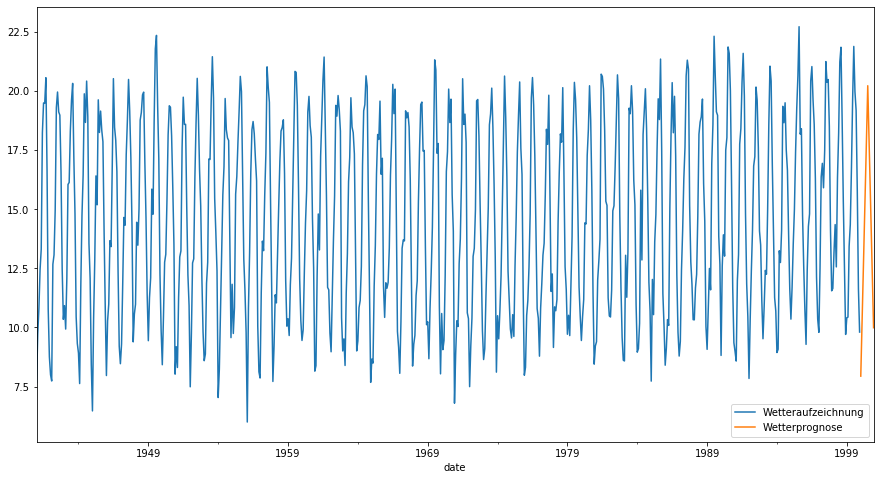

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

df['temp_mean']['1941-01-31':"1999-12-31"].plot(figsize=(15, 8))
X_forecast['temp_prog']['2000-01-01':'2000-12-01'].plot(figsize=(15, 8))
plt.legend(['Wetteraufzeichnung', 'Wetterprognose'])

Try other forecasting Methods

## Naive Forecasts

In [33]:
df_index.head()
X = df_index[['month', 'year']]
y = df_index['temp_mean']
Xtrain_naive = X[:15507]
Xtest_naive = X[15507:]
ytrain_naive = y[:15507]
ytest_naive = y[15507:]
df_index.tail()

,temp_mean,pruefung,month,year
date,,,,
1999-12-22,12.8,0,12,1999
1999-12-28,9.4,0,12,1999
1999-12-29,12.1,0,12,1999
1999-12-30,8.4,0,12,1999
1999-12-31,7.4,0,12,1999


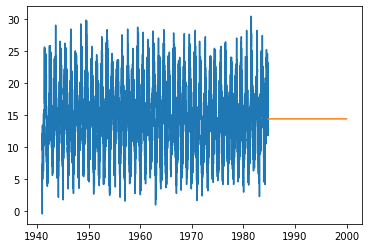

In [34]:
#Naive Forecast 1: mean
[ytrain_naive.mean()]
ypred_mean = pd.Series([ytrain_naive.mean()]*5004, index= ytest_naive.index)
ypred_mean
plt.plot(ytrain_naive)
plt.plot(ypred_mean)

In [35]:
#Naive Forecast 2: last value
ypred_last = pd.Series(ytrain_naive[1999-12-31] , index= ytest_naive.index)
ypred_last

date
1984-10-29    20.6
1984-10-30    20.6
1984-10-31    20.6
1984-11-01    20.6
1984-11-02    20.6
              ... 
1999-12-22    20.6
1999-12-28    20.6
1999-12-29    20.6
1999-12-30    20.6
1999-12-31    20.6
Length: 5004, dtype: float64

In [36]:
#Naive Forecast 3: linear drift, sehr geringer Drift
drift = (ytrain_naive.iloc[-1] - ytrain_naive.iloc[0])/len(ytrain_naive)
drift

0.0005610369510543625

In [37]:
#Naive Forecast 4: linear regression
from sklearn.linear_model import LinearRegression
m = LinearRegression()

# train the model
m.fit(Xtrain_naive, ytrain_naive)
print(m.score(Xtrain_naive,ytrain_naive))
# test the model
print(m.score(Xtest_naive,ytest_naive))
#predict
ypred_lin = m.predict(Xtest_naive)
ypred_lin.shape

0.07156646442820902
0.0412939328136851


(5004,)

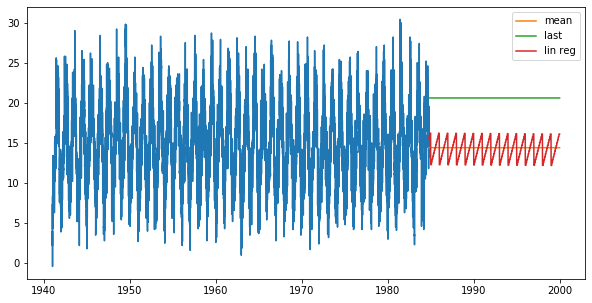

In [38]:
plt.figure(figsize=([10,5]))
plt.plot(ytrain_naive.index, ytrain_naive)
plt.plot(ytest_naive.index, ypred_mean, label ='mean')
plt.plot(ytest_naive.index, ypred_last,label ='last')
plt.plot(ytest_naive.index, ypred_lin,label ='lin reg')
#plt.plot(df_auto.index, ypred_auto,label ='lin auto')
plt.legend()

### Autoregressive Modelle

In [39]:
df_index.head()

,temp_mean,pruefung,month,year
date,,,,
1941-01-02,7.3,0,1,1941
1941-01-03,4.2,0,1,1941
1941-01-04,4.8,0,1,1941
1941-01-05,2.6,0,1,1941
1941-01-06,2.2,0,1,1941


In [40]:

df_auto = df_index[['temp_mean', 'month', 'year']].copy()
df_auto['t-1'] = df_auto['temp_mean'].shift(1)
df_auto['t-2'] = df_auto['temp_mean'].shift(2)
df_auto['t-3'] = df_auto['temp_mean'].shift(3)
df_auto['t-4'] = df_auto['temp_mean'].shift(4)

df_auto.dropna(inplace=True)
df_auto.shape

(20507, 7)

In [41]:
df_auto['month_i'] = np.abs(df_auto.index.month - 7)

In [42]:
df_auto_month=df_auto.resample('1m').mean().copy()
df_auto_month.head()

,temp_mean,month,year,t-1,t-2,t-3,t-4,month_i
date,,,,,,,,
1941-01-31,8.123077,1,1941,7.838462,7.569231,7.269231,7.111538,6
1941-02-28,9.722222,2,1941,9.640741,9.581481,9.544444,9.496296,5
1941-03-31,10.806897,3,1941,11.010345,11.113793,11.141379,11.155172,4
1941-04-30,12.439286,4,1941,12.260714,12.192857,12.164286,12.239286,3
1941-05-31,13.314286,5,1941,13.239286,13.214286,13.200000,13.100000,2


In [43]:
X = df_auto[['t-1', 't-2', 't-3','t-4', 'month_i']]
y = df_auto['temp_mean']

In [44]:
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures(interaction_only=True)
Xp = p.fit_transform(X)
X = Xp
Xp.shape

(20507, 16)

In [45]:
Xtrain = X[:15507]
Xtest = X[15507:]
ytrain = y[:15507]
ytest = y[15507:]

In [46]:
from sklearn.linear_model import LinearRegression, Ridge

In [47]:
m = LinearRegression()
m.fit(Xtrain, ytrain)
m.score(Xtrain, ytrain)

0.8589716995740121

In [48]:
m.score(Xtest, ytest)

0.8585264042903729

In [49]:
m.coef_, m.intercept_

(array([ 0.        ,  0.93053136,  0.00711377, -0.09622519,  0.05409055,
        -0.3103944 , -0.01156039,  0.00744747,  0.00098105, -0.02313464,
         0.00181807,  0.00253352,  0.00395921, -0.00376705,  0.01647137,
        -0.00450928]),
 3.2945868393063282)

In [50]:
ypred_auto = pd.Series(m.predict(Xtest), index=ytest.index)

In [51]:
ypred_auto

date
1984-11-02    14.989613
1984-11-03    12.893184
1984-11-04    11.275444
1984-11-05    12.123290
1984-11-06    10.579919
                ...    
1999-12-22    10.225135
1999-12-28    12.194612
1999-12-29     9.584024
1999-12-30    11.940497
1999-12-31     8.850899
Length: 5000, dtype: float64

In [52]:
ypredtr = pd.Series(m.predict(Xtrain), index=ytrain.index)

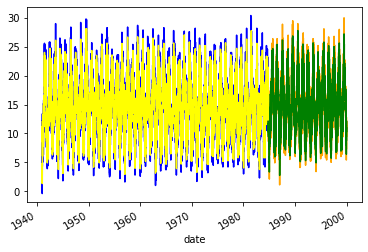

In [53]:
ytrain.plot(color='blue')
ytest.plot(color='orange')
ypred_auto.plot(color='green')
ypredtr.plot(color='yellow')

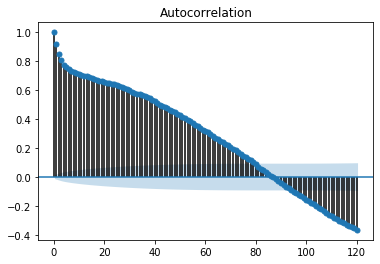

In [54]:
from statsmodels.graphics.tsaplots import plot_acf
p = plot_acf(df_auto['temp_mean'], lags=120)

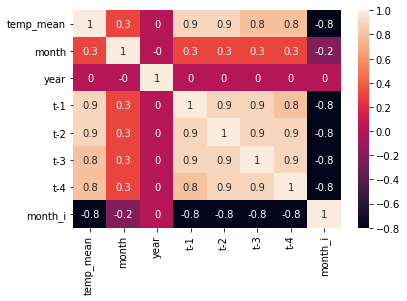

In [55]:
sns.heatmap(df_auto.corr().round(1), annot=True)

Calculate quality metrics

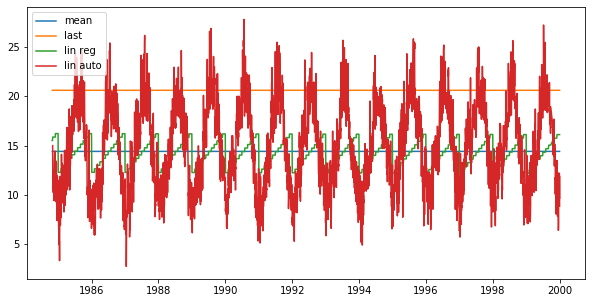

In [56]:
plt.figure(figsize=([10,5]))
plt.plot(ytest_naive.index, ypred_mean, label ='mean')
plt.plot(ytest_naive.index, ypred_last,label ='last')
plt.plot(ytest_naive.index, ypred_lin,label ='lin reg')
plt.plot(ytest.index, ypred_auto,label ='lin auto')
plt.legend()

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#MSE (mittlere quadratische Abweichung - anfällig für Ausreißer)
print ('MSE und MAE des Forecast mit Mean: ', mean_squared_error(ytest_naive, ypred_mean),' ',mean_absolute_error(ytest_naive, ypred_mean))
print ('MSE und MAE des Last Estimator: ', mean_squared_error(ytest_naive, ypred_last),' ',mean_absolute_error(ytest_naive, ypred_last))
print ('MSE und MAE der linearen Regression: ', mean_squared_error(ytest_naive, ypred_lin),' ',mean_absolute_error(ytest_naive, ypred_lin))
print ('MSE und MAE der Autogression: ', mean_squared_error(ytest, ypred_auto),' ',mean_absolute_error(ytest, ypred_auto))
##MAE (mittlere absolute Abweichung)
#print ('MAE: ', mean_absolute_error(ytest, ypred_auto))

#AIC erlaubt Vergleich unterschiedlicher Modelle niedriger ist besser

MSE und MAE des Forecast mit Mean:  21.49585765851301   3.839493586017238
MSE und MAE des Last Estimator:  52.81831534772184   6.087549960031976
MSE und MAE der linearen Regression:  20.298007130357853   3.695172355896573
MSE und MAE der Autogression:  2.9974276944615745   1.331875457163053


## Download more data!

In [171]:
import os
import re

In [172]:
alle_wetterstationen = []

for dateiname in os.listdir(r"C:\Users\denni\Desktop\Week_5"):
    if dateiname.endswith('.txt'):
        #print(dateiname)
        path = str("C:/Users/denni/Desktop/Week_5/" + dateiname)
        #print(path)
        #data = pd.read_csv(path,header=12)
        #data= re.sub(r'This is the blended series of station',r'')
        alle_wetterstationen.append(path)

print(len(alle_wetterstationen))
alle_wetterstationen

5541


['C:/Users/denni/Desktop/Week_5/TG_STAID000001.txt',
 'C:/Users/denni/Desktop/Week_5/TG_STAID000002.txt',
 'C:/Users/denni/Desktop/Week_5/TG_STAID000003.txt',
 'C:/Users/denni/Desktop/Week_5/TG_STAID000004.txt',
 'C:/Users/denni/Desktop/Week_5/TG_STAID000005.txt',
 'C:/Users/denni/Desktop/Week_5/TG_STAID000006.txt',
 'C:/Users/denni/Desktop/Week_5/TG_STAID000007.txt',
 'C:/Users/denni/Desktop/Week_5/TG_STAID000008.txt',
 'C:/Users/denni/Desktop/Week_5/TG_STAID000009.txt',
 'C:/Users/denni/Desktop/Week_5/TG_STAID000010.txt',
 'C:/Users/denni/Desktop/Week_5/TG_STAID000011.txt',
 'C:/Users/denni/Desktop/Week_5/TG_STAID000012.txt',
 'C:/Users/denni/Desktop/Week_5/TG_STAID000013.txt',
 'C:/Users/denni/Desktop/Week_5/TG_STAID000014.txt',
 'C:/Users/denni/Desktop/Week_5/TG_STAID000015.txt',
 'C:/Users/denni/Desktop/Week_5/TG_STAID000016.txt',
 'C:/Users/denni/Desktop/Week_5/TG_STAID000021.txt',
 'C:/Users/denni/Desktop/Week_5/TG_STAID000022.txt',
 'C:/Users/denni/Desktop/Week_5/TG_STAID000023

In [173]:
stations = open("stationlist.txt", "r", encoding='utf-8')
print(stations.read())
stations=[stations]

TG_STAID000001.txt:This is the blended series of station VAEXJOE, SWEDEN (STAID: 1)
TG_STAID000002.txt:This is the blended series of station FALUN, SWEDEN (STAID: 2)
TG_STAID000003.txt:This is the blended series of station STENSELE, SWEDEN (STAID: 3)
TG_STAID000004.txt:This is the blended series of station LINKOEPING, SWEDEN (STAID: 4)
TG_STAID000005.txt:This is the blended series of station LINKOEPING-MALMSLAETT, SWEDEN (STAID: 5)
TG_STAID000006.txt:This is the blended series of station KARLSTAD, SWEDEN (STAID: 6)
TG_STAID000007.txt:This is the blended series of station KARLSTAD-AIRPORT, SWEDEN (STAID: 7)
TG_STAID000008.txt:This is the blended series of station OESTERSUND, SWEDEN (STAID: 8)
TG_STAID000009.txt:This is the blended series of station OESTERSUND-FROESOEN, SWEDEN (STAID: 9)
TG_STAID000010.txt:This is the blended series of station STOCKHOLM, SWEDEN (STAID: 10)
TG_STAID000011.txt:This is the blended series of station KREMSMUENSTER, AUSTRIA (STAID: 11)
TG_STAID000012.txt:This 

In [174]:
stationlist = [line.rstrip('\n') for line in open('stationlist.txt',encoding='utf-8')]
stationlist_clean=[]
for element in stationlist:
    stationlist_clean.append(str(re.findall("\w+\,\s\w+", element)))
stationlist_clean

["['VAEXJOE, SWEDEN']",
 "['FALUN, SWEDEN']",
 "['STENSELE, SWEDEN']",
 "['LINKOEPING, SWEDEN']",
 "['MALMSLAETT, SWEDEN']",
 "['KARLSTAD, SWEDEN']",
 "['AIRPORT, SWEDEN']",
 "['OESTERSUND, SWEDEN']",
 "['FROESOEN, SWEDEN']",
 "['STOCKHOLM, SWEDEN']",
 "['KREMSMUENSTER, AUSTRIA']",
 "['GRAZ, AUSTRIA']",
 "['INNSBRUCK, AUSTRIA']",
 "['SALZBURG, AUSTRIA']",
 "['SONNBLICK, AUSTRIA']",
 "['WIEN, AUSTRIA']",
 "['GRIC, CROATIA']",
 "['AMIANDOS, CYPRUS']",
 "['LARNACA, CYPRUS']",
 "['LIMASSOL, CYPRUS']",
 "['NICOSIA, CYPRUS']",
 "['POLIS, CYPRUS']",
 "['KLEMENTINUM, CZECH']",
 "['KAISANIEMI, FINLAND']",
 "['LENTOASEMA, FINLAND']",
 "['KESKUS, FINLAND']",
 "['LONCHAMP, FRANCE']",
 "['BOURGES, FRANCE']",
 "['BLAGNAC, FRANCE']",
 "['MERIGNAC, FRANCE']",
 "['PERPIGNAN, FRANCE']",
 "['EXUPERY, FRANCE']",
 "['MARIGNANE, FRANCE']",
 "['BAMBERG, GERMANY']",
 "['DAHLEM, GERMANY']",
 "['BREMEN, GERMANY']",
 "['WAHNSDORF, GERMANY']",
 "['FRANKFURT, GERMANY']",
 "['HALLE, GERMANY']",
 "['BERGEDORF, GERMA

loc = Nominatim(user_agent='spiced_maps').geocode('GALATI, ROMANIA')
print(loc)
coord_station = loc.latitude, loc.longitude
coord_station

In [175]:
for element in stationlist_clean:
    if element=='[]':
        stationlist_clean.remove(element)

stationlist_clean

["['VAEXJOE, SWEDEN']",
 "['FALUN, SWEDEN']",
 "['STENSELE, SWEDEN']",
 "['LINKOEPING, SWEDEN']",
 "['MALMSLAETT, SWEDEN']",
 "['KARLSTAD, SWEDEN']",
 "['AIRPORT, SWEDEN']",
 "['OESTERSUND, SWEDEN']",
 "['FROESOEN, SWEDEN']",
 "['STOCKHOLM, SWEDEN']",
 "['KREMSMUENSTER, AUSTRIA']",
 "['GRAZ, AUSTRIA']",
 "['INNSBRUCK, AUSTRIA']",
 "['SALZBURG, AUSTRIA']",
 "['SONNBLICK, AUSTRIA']",
 "['WIEN, AUSTRIA']",
 "['GRIC, CROATIA']",
 "['AMIANDOS, CYPRUS']",
 "['LARNACA, CYPRUS']",
 "['LIMASSOL, CYPRUS']",
 "['NICOSIA, CYPRUS']",
 "['POLIS, CYPRUS']",
 "['KLEMENTINUM, CZECH']",
 "['KAISANIEMI, FINLAND']",
 "['LENTOASEMA, FINLAND']",
 "['KESKUS, FINLAND']",
 "['LONCHAMP, FRANCE']",
 "['BOURGES, FRANCE']",
 "['BLAGNAC, FRANCE']",
 "['MERIGNAC, FRANCE']",
 "['PERPIGNAN, FRANCE']",
 "['EXUPERY, FRANCE']",
 "['MARIGNANE, FRANCE']",
 "['BAMBERG, GERMANY']",
 "['DAHLEM, GERMANY']",
 "['BREMEN, GERMANY']",
 "['WAHNSDORF, GERMANY']",
 "['FRANKFURT, GERMANY']",
 "['HALLE, GERMANY']",
 "['BERGEDORF, GERMA

In [213]:
station_subset= stationlist_clean[23:]

for element in stationlist_clean:
    #print(type(element))
    if element==', CYPRUS':
        print(element)
        stationlist_clean.remove(element)

In [ ]:
from geopy.geocoders import Nominatim

stationlist_coord=[]
for element in station_subset:
    loc = Nominatim(user_agent='spiced_maps').geocode(element)
    print(loc.latitude, type(loc), loc)
    coord_station = loc.latitude, loc.longitude
    stationlist_coord.append(coord_station)
print(len(stationlist_coord))
stationlist_coord

#### Read in more Data: Vergleichsstandort am Äquator
Hypothese: Klimawandel radikaler durch spezifische Sonneneinstrahlung

In [182]:
data = pd.read_csv('TG_STAID000318.txt', header=15, index_col = 2, parse_dates=True)
data=data.drop(columns=['STAID',' SOUID'])
data.rename(columns={' Q_TG': 'pruefung', '   TG': 'temp_mean'}, inplace=True)
data= data.reset_index()
data.rename(columns={'    DATE': 'date'}, inplace=True)
data=data.set_index('date')
data= data[(data.pruefung == 0)]
data['temp_mean']=data['temp_mean'].div(10)
print(data.shape)
data_dachla=data
data_dachla.head()

(1826, 2)


,temp_mean,pruefung
date,,
1994-01-01,15.5,0
1994-01-02,13.7,0
1994-01-03,13.3,0
1994-01-04,13.5,0
1994-01-05,14.1,0


Autoregression: Klimatischer Vergleich Dachla, Ägypten

In [208]:
df = data_dachla.reset_index()
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

df_index = df.set_index('date')

df_auto_dachla = df_index[['temp_mean', 'month', 'year']].copy()
df_auto_dachla['t-1'] = df_auto_dachla['temp_mean'].shift(1)
df_auto_dachla['t-2'] = df_auto_dachla['temp_mean'].shift(2)
df_auto_dachla['t-3'] = df_auto_dachla['temp_mean'].shift(3)
df_auto_dachla['t-4'] = df_auto_dachla['temp_mean'].shift(4)

df_auto_dachla.dropna(inplace=True)
print(df_auto_dachla.shape)

#df_auto['month_i'] = np.abs(df_auto.index.month - 7)

df_auto_month_dachla=df_auto_dachla.resample('1m').mean().copy()
df_auto_month_dachla.head()

(1822, 7)


,temp_mean,month,year,t-1,t-2,t-3,t-4
date,,,,,,,
1994-01-31,15.059259,1,1994,15.107407,15.070370,15.055556,15.003704
1994-02-28,14.289286,2,1994,14.164286,14.117857,14.046429,14.139286
1994-03-31,18.012903,3,1994,17.919355,17.751613,17.509677,17.296774
1994-04-30,24.963333,4,1994,24.783333,24.663333,24.586667,24.450000
1994-05-31,28.312903,5,1994,28.112903,27.890323,27.687097,27.480645


In [190]:
def autoregression(df):
    X = df[['t-1', 't-2', 't-3','t-4', 'month']]
    y = df['temp_mean']
    
    p = PolynomialFeatures(interaction_only=True)
    Xp = p.fit_transform(X)
    X = Xp
    Xp.shape
    
    Xtrain = X[:1500]
    Xtest = X[1500:]
    ytrain = y[:1500]
    ytest = y[1500:]
    
    m = LinearRegression()
    m.fit(Xtrain, ytrain)
    m.score(Xtrain, ytrain)
    
    print(m.score(Xtest, ytest))
    
    ypred_auto = pd.Series(m.predict(Xtest), index=ytest.index)
    
    plt.plot(ytrain.index, ytrain, label='trainingszeitraum')
    plt.plot(ytest.index, ypred_auto,label ='lin auto')

0.963300588657119


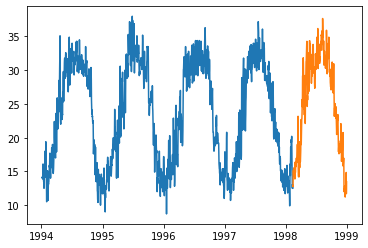

In [191]:
autoregression(df_auto_dachla)

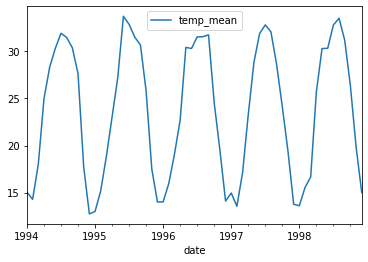

In [194]:
df_auto_month_dachla.plot(y='temp_mean')

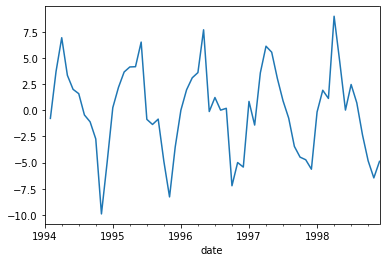

In [195]:
df_auto_month_dachla['diff'] = df_auto_month_dachla['temp_mean'].diff()
df_auto_month_dachla['diff'].plot()

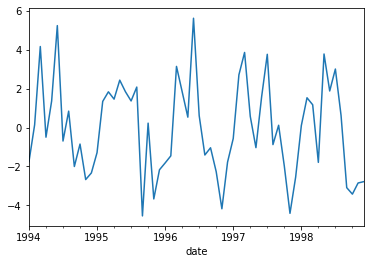

In [210]:
data_month_porto['diff']=data_month_porto['temp_mean'].diff()
data_month_porto['diff']['1994-01-01':'1998-12-31'].plot()